In [1]:
import numpy as np
import scipy

import HSIC

%pylab inline


Populating the interactive namespace from numpy and matplotlib


# Testing HSIC

A common approach to measure dependence is the Pearson correlation. However, the pearson correlation is measure for linear dependence. The following example shows a strong dependence between X and Y, but it is not linear. As a result, the Pearson correlation is close to zero and not significant. However, when the data is transform (X^2), the Pearson correlation does become highly significant.

HSIC: 0.053353 (0.001996)
HSIC: 0.053355 (0.009901)
Pearson's r: -0.007668 (0.864193)
Pearson's r after transforming the data: 0.999996 (0.000000)


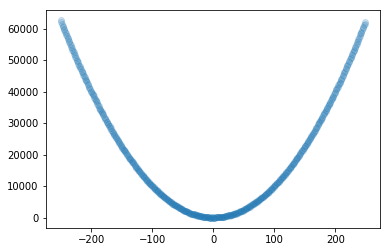

In [4]:
# A couple of test cases.
# This is a case which pearson correlation is not able to detect.
random.seed(2523523)
N = 500
X = np.zeros((N, 1))
Y = np.zeros((N, 1))

for i in xrange(-N/2, N/2):
    X[i] = i
    Y[i] = i**2 + np.random.normal(0, 50)     
    
plt.scatter(X,Y,alpha=0.2)

# Low p-values for HSIC. High p-values for pearson correlation. 
print "HSIC: %f (%f)"% HSIC.HSIC_pval(X,Y)
print "HSIC: %f (%f)"% HSIC.HSIC_pval_full_gram(X,Y) # This method calculates the full Gram matrices
print "Pearson's r: %f (%f)"% scipy.stats.pearsonr(X,Y)

# After transforming the data, we do get a high correlation.
print "Pearson's r after transforming the data: %f (%f)"% scipy.stats.pearsonr(X**2,Y)

This is an easy case with linear dependence. Both HSIC and the Pearson correlation have p-values << 0.05

HSIC: 0.102055 (0.001996)
Pearson's r: 0.947186 (0.000000)


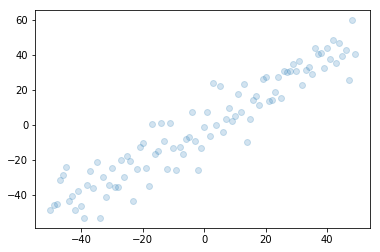

In [5]:
N = 100
X = np.zeros((N, 1))
Y = np.zeros((N, 1))
for i in xrange(-N/2, N/2):
    X[i] = i
    Y[i] = i + np.random.normal(0,10)
plt.scatter(X,Y,alpha=0.2)
print "HSIC: %f (%f)"% HSIC.HSIC_pval(X,Y)
print "Pearson's r: %f (%f)"% scipy.stats.pearsonr(X,Y)

Another example with a strong linear dependence. Again, both HSIC and the Pearson correlation have p-values << 0.05

HSIC: 0.098349 (0.001996)
Pearson's r: -0.938514 (0.000000)


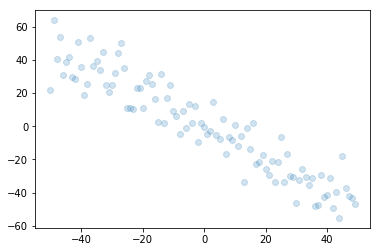

In [7]:
N = 100
X = np.zeros((N, 1))
Y = np.zeros((N, 1))
for i in xrange(-N/2, N/2):
    X[i] = i
    Y[i] = -i + np.random.normal(0,10)
plt.scatter(X,Y,alpha=0.2)
print "HSIC: %f (%f)"% HSIC.HSIC_pval(X,Y)
print "Pearson's r: %f (%f)"% scipy.stats.pearsonr(X,Y)

In the following example, X and Y are independent. As expected, both the Pearson correlation and HSIC won't measure a statistically significant association.

HSIC: 0.000612 (0.391218)
HSIC: 0.000613 (0.267327)
Pearson's r: -0.028636 (0.522927)


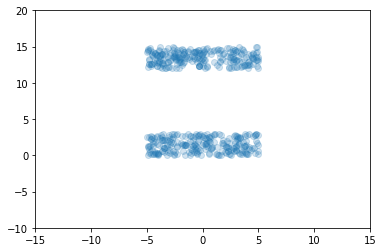

In [10]:
# X and Y are independent
N = 500
X = np.zeros((N, 1))
Y = np.zeros((N, 1))

for i in xrange(-N/2, N/2, 2):
    X[i] = [np.random.uniform(-5,5)]
    Y[i] = [np.random.uniform(0,3)]
    X[i + 1] = [np.random.uniform(-5,5)]
    Y[i + 1] = [np.random.uniform(12,15)]

plt.scatter(X,Y,alpha=0.2)
plt.axis([-15,15, -10,20])

print "HSIC: %f (%f)"% HSIC.HSIC_pval(X,Y)
print "HSIC: %f (%f)"% HSIC.HSIC_pval_full_gram(X,Y)
print "Pearson's r: %f (%f)"% scipy.stats.pearsonr(X,Y)

When rotating the data, X and Y do become dependent (except when the rotation is 0, 90 or 180 degrees). 

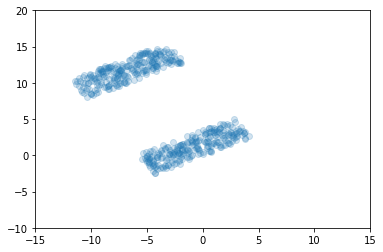

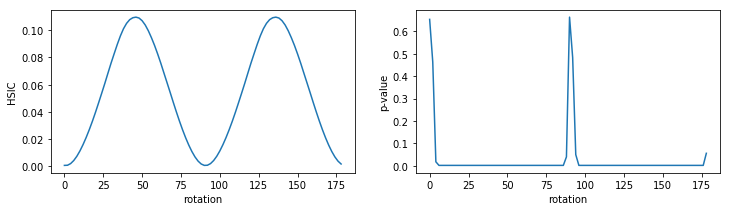

In [7]:
# (may take a while). 
HSICvalues = []
pvalues = []
step_size = 2
for i in range(0, 180, step_size):
    theta =  math.radians(i)
    rotation_matrix = np.mat([[math.cos(theta), -sin(theta)], [sin(theta), cos(theta)]])
    XY =  column_stack((X,Y))
    rotated = np.transpose(rotation_matrix * np.mat(np.transpose(XY)))
    
    HSICval,pval = HSIC.HSIC_pval(rotated[:,0], rotated[:,1])
    HSICvalues.append(HSICval)
    pvalues.append(pval)
    if i == 30:
        plt.scatter(rotated[:,0].tolist(),rotated[:,1].tolist(),alpha=0.2)
        plt.axis([-15,15, -10,20])

fig = plt.figure(figsize=(12, 3)) 
plt.subplot(121)
plt.plot(range(0,180,step_size), HSICvalues)
plt.ylabel('HSIC')
plt.xlabel('rotation')

plt.subplot(122)
plt.plot(range(0,180,step_size), pvalues)
plt.ylabel('p-value')
plt.xlabel('rotation')


In [9]:
# Testing the effect of eta
random.seed(2523523)
N = 1000
X = np.zeros((N, 2))
Y = np.zeros((N, 2))

for i in xrange(-N/2, N/2):
    X[i] = [np.random.normal(0, 50), np.random.normal(0, 50)]
    Y[i] = [np.random.normal(0, 50), np.random.normal(0, 50)]
    
etas = [0.1, 0.01, 0.001, 0.0001]
for eta in etas:
    print "HSIC: %f (%f)"% HSIC.HSIC_pval(X, Y, 100, "Gaussian","Gaussian", eta)

HSIC: 0.000268 (0.514851)
HSIC: 0.000301 (0.594059)
HSIC: 0.000304 (0.603960)
HSIC: 0.000305 (0.613861)


The following is an example where HSIC is applied on a categorial variable (1,2,3). Instead of a Gaussian kernel, we now use the delta kernel.

HSIC: 0.000759 (0.407960)


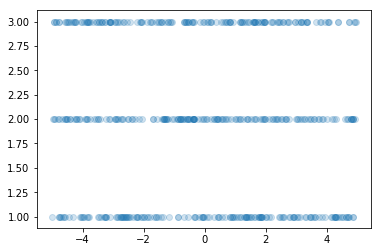

In [11]:
# Multiclass:  Independence
N = 500
X = np.zeros((N, 1))
Y = np.zeros((N, 1))
for i in xrange(N):
    X[i] = [np.random.uniform(-5,5)]
    Y[i] = [random.randint(1,4)]
plt.scatter(X,Y,alpha=0.2)
print "HSIC: %f (%f)"% HSIC.HSIC_pval(X, Y, N_samp=200, kernelX="Gaussian", kernelY="Delta")


In [ ]:
Another example, but in this case ther

HSIC: 0.020931 (0.004975) 


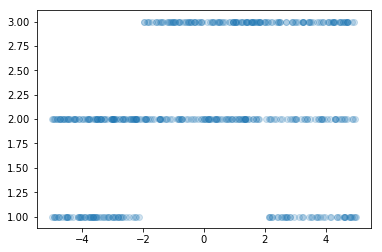

In [11]:
# Multiclass
# Dependence
N = 500
X = np.zeros((N, 1))
Y = np.zeros((N, 1))
for i in xrange(N):
    X[i] = [np.random.uniform(-5,5)]
    if X[i] < -2:
        Y[i] = [random.randint(1,3)]
    elif X[i] > 2:
        Y[i] = [random.randint(1,4)]
    else:
        Y[i] = [random.randint(2,4)]

plt.scatter(X,Y,alpha=0.2)
print "HSIC: %f (%f) "% HSIC.HSIC_pval(X, Y, N_samp=200, kernelX="Gaussian", kernelY="Delta")
